In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:

%matplotlib inline

In [11]:
plt.style.use('bmh')

In [12]:
df = pd.read_csv('NCHS.csv')
df.head()

,Year,Race,Sex,Average Life Expectancy (Years),Age-adjusted Death Rate
0,1900,All Races,Both Sexes,47.3,2518.0
1,1901,All Races,Both Sexes,49.1,2473.1
2,1902,All Races,Both Sexes,51.5,2301.3
3,1903,All Races,Both Sexes,50.5,2379.0
4,1904,All Races,Both Sexes,47.6,2502.5


In [13]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             1071 non-null   int64  
 1   Race                             1071 non-null   object 
 2   Sex                              1071 non-null   object 
 3   Average Life Expectancy (Years)  1065 non-null   float64
 4   Age-adjusted Death Rate          1071 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 42.0+ KB


In [14]:
df.dropna(inplace=True)

count    1065.000000
mean       64.500188
std        11.843765
min        29.100000
25%        57.100000
50%        66.800000
75%        73.900000
max        81.400000
Name: Average Life Expectancy (Years), dtype: float64


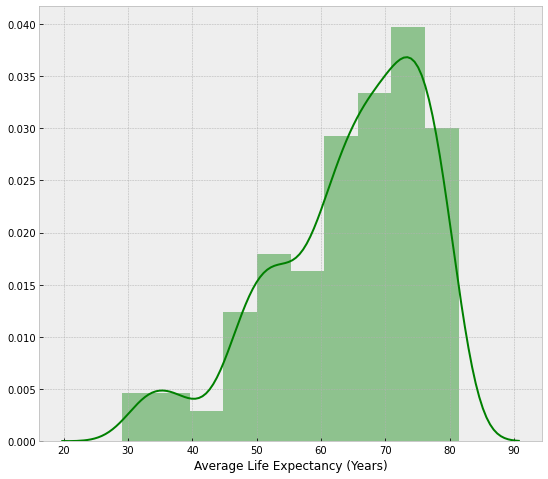

In [16]:
print(df['Average Life Expectancy (Years)'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Average Life Expectancy (Years)'], color='g', bins=10, hist_kws={'alpha': 0.4});

### With this plot we can see that the average life expectancy is skewed left and some outliers exist below 45. We will want to get rid of the them to get a normal distribution of the independent variable (Average Life Expectancy (Years)).

In [17]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

In [18]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Year,Average Life Expectancy (Years),Age-adjusted Death Rate
0,1900,47.3,2518.0
1,1901,49.1,2473.1
2,1902,51.5,2301.3
3,1903,50.5,2379.0
4,1904,47.6,2502.5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023E510B5820>,
      dtype=object)

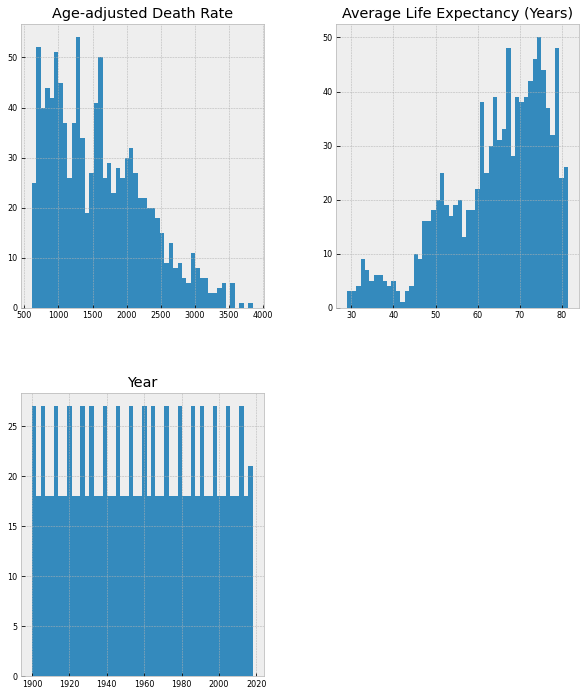

In [19]:
df_num.hist(figsize=(10, 12), bins=50, xlabelsize=8, ylabelsize=8)

# ### It is interesting to see the opposing skews between age-adjusted death rates and life expectancy.

In [20]:
df['Average Life Expectancy (Years)'].mean()

64.50018779342723

In [21]:
#to find the mode of AvgLifeExp
from collections import Counter
data = Counter(df['Average Life Expectancy (Years)'])
data.most_common()   # Returns all unique items and their counts
data.most_common(1)

[(66.8, 11)]

In [24]:
df['Average Life Expectancy (Years)'].var()



140.27477440079085

In [23]:
df['Average Life Expectancy (Years)'].std()

11.84376521216082

In [25]:
df['Age-adjusted Death Rate'].mean()

1597.529483568075

In [26]:

#to find the mode of Age-adjusted Death Rate
data = Counter(df['Age-adjusted Death Rate'])
data.most_common()   # Returns all unique items and their counts
data.most_common(1)

[(1766.9, 2)]

In [27]:

df['Age-adjusted Death Rate'].var()

464575.98762614257

In [28]:
df['Age-adjusted Death Rate'].std()

681.5981129860488

In [30]:
import numpy as np
import thinkstats2
import thinkplot

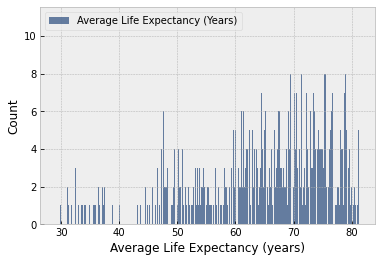

In [31]:
#Histogram of Average Life Expectancy
hist = thinkstats2.Hist(df['Average Life Expectancy (Years)'], label='Average Life Expectancy (Years)')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Average Life Expectancy (years)', ylabel='Count')

In [32]:
#We normalize the disrtibution by dividing through by the total count and getting a PMF.
n = hist.Total()
pmf = hist.Copy()
for x, freq in hist.Items():
    pmf[x] = freq / n

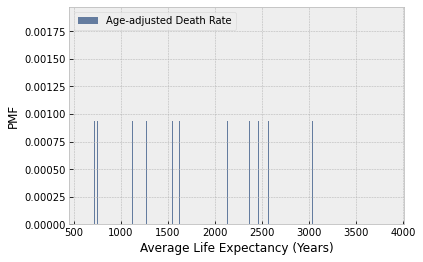

In [38]:

thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Average Life Expectancy (Years)', ylabel='PMF')

In [34]:
pmf = thinkstats2.Pmf(df['Age-adjusted Death Rate'], label='Age-adjusted Death Rate')

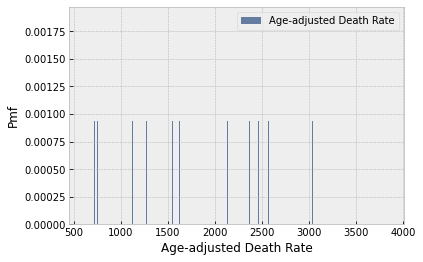

In [35]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Age-adjusted Death Rate', ylabel='Pmf')

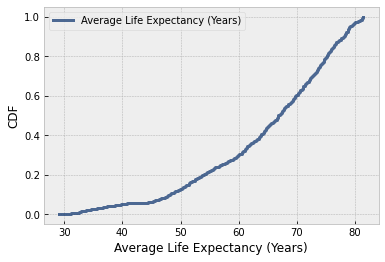

In [37]:
cdf = thinkstats2.Cdf(df['Average Life Expectancy (Years)'], label='Average Life Expectancy (Years)')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Average Life Expectancy (Years)', ylabel='CDF', loc='upper left')

The CDF shows us some useful information if we consider percentiles. It looks like less than 10% of reported life expectancies are below 45 years, and nearly 50% of expextancies are above 60 years. Common ages of expectancy appear as the steeper portion of our line, likely between the ages of ~62 to ~75 years. Our visual representation doesn't show a clear mode.

In [39]:
LE = df['Average Life Expectancy (Years)']
DR = df['Age-adjusted Death Rate'].dropna()

Mean, Var 1588.1627751196172 427004.74781048053
Sigma 653.456002964607


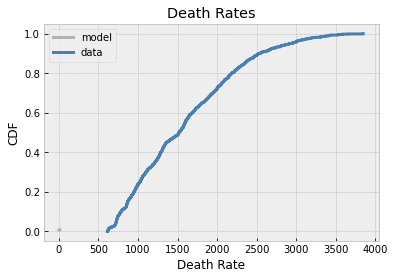

In [40]:

#Estimate parameters
mu, var = thinkstats2.TrimmedMeanVar(DR, p=0.01)
print('Mean, Var', mu, var)
    
# plot the model
sigma = np.sqrt(var)
print('Sigma', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=12.5)

thinkplot.Plot(xs, ps, label='model', color='0.6')

# plot the data
cdf = thinkstats2.Cdf(DR, label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title='Death Rates',
                 xlabel='Death Rate',
                 ylabel='CDF')


The model fits the data well.

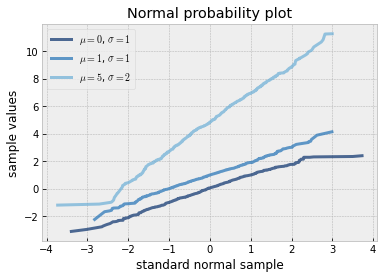

In [41]:
n = 1000
thinkplot.PrePlot(3) 

mus = [0, 1, 5]
sigmas = [1, 1, 2]

for mu, sigma in zip(mus, sigmas):
    sample = np.random.normal(mu, sigma, n)
    xs, ys = thinkstats2.NormalProbability(sample)
    label = '$\mu=%d$, $\sigma=%d$' % (mu, sigma)
    thinkplot.Plot(xs, ys, label=label)

thinkplot.Config(title='Normal probability plot',
                 xlabel='standard normal sample',
                 ylabel='sample values')

This is a visual test for normality. Our plot shows that the plot is approximately straight if the data are in fact part of a normal distribution.

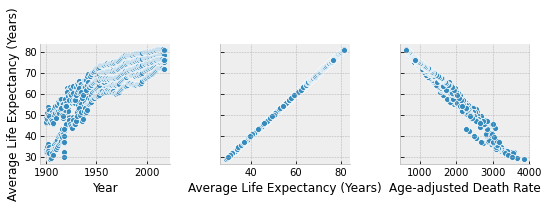

In [42]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['Average Life Expectancy (Years)'])


We can clearly identify the relationships with Average Life Expectancy. The year has a generally linear relationship, and the Age-Adjusted Death Rate has a negative linear relationship.